###***Name: Krish Thakkar***
###***Sap-Id: 60009230213***
###***Batch:D2-2***


In [ ]:
import pandas as pd
df=pd.read_csv('/content/PlayTennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


#***Hot Encoding***


In [ ]:
df['Play Tennis']=df['Play Tennis'].replace({'Yes':1,'No':0})
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rain,Mild,High,Weak,1
4,Rain,Cool,Normal,Weak,1
5,Rain,Cool,Normal,Strong,0
6,Overcast,Cool,Normal,Strong,1
7,Sunny,Mild,High,Weak,0
8,Sunny,Cool,Normal,Weak,1
9,Rain,Mild,Normal,Weak,1


#***Entropy Outlook***


In [ ]:
import pandas as pd
import math

def calculate_entropy_outlook(df, outlook_value):

    filtered_df = df[df['Outlook'] == outlook_value]

    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy


outlooks = df['Outlook'].unique()
for outlook in outlooks:
    entropy = calculate_entropy_outlook(df, outlook)
    print(f"Entropy for Outlook '{outlook}': {entropy}")

Entropy for Outlook 'Sunny': 0.9709505944546686
Entropy for Outlook 'Overcast': 0.0
Entropy for Outlook 'Rain': 0.9709505944546686


#***Entropy Temperature***

In [ ]:
import pandas as pd
import math

def calculate_entropy_temperature(df, temperature_value):

    filtered_df = df[df['Temperature'] == temperature_value]
    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

temperatures = df['Temperature'].unique()
for temp in temperatures:
    entropy = calculate_entropy_temperature(df, temp)
    print(f"Entropy for Temperature '{temp}': {entropy}")

Entropy for Temperature 'Hot': 1.0
Entropy for Temperature 'Mild': 0.9182958340544896
Entropy for Temperature 'Cool': 0.8112781244591328


#***Entropy Humidity***

In [ ]:
import pandas as pd
import math

def calculate_entropy_humidity(df, humidity_value):

    filtered_df = df[df['Humidity'] == humidity_value]
    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

humidities = df['Humidity'].unique()
for humidity in humidities:
    entropy = calculate_entropy_humidity(df, humidity)
    print(f"Entropy for Humidity '{humidity}': {entropy}")

Entropy for Humidity 'High': 0.9852281360342515
Entropy for Humidity 'Normal': 0.5916727785823275


#***Entropy Wind***

In [ ]:
import pandas as pd
import math

def calculate_entropy_wind(df, wind_value):

    filtered_df = df[df['Wind'] == wind_value]


    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

winds = df['Wind'].unique()
for wind in winds:
    entropy = calculate_entropy_wind(df, wind)
    print(f"Entropy for Wind '{wind}': {entropy}")

Entropy for Wind 'Weak': 0.8112781244591328
Entropy for Wind 'Strong': 1.0


#***Gini Index***


In [ ]:
import pandas as pd

def calculate_gini_index(df, attribute):
    gini_index = 0
    total_instances = len(df)

    attribute_values = df[attribute].unique()

    for value in attribute_values:
        subset = df[df[attribute] == value]
        proportion = len(subset) / total_instances
        gini_index += proportion * (1 - (subset['Play Tennis'].value_counts(normalize=True) ** 2).sum())

    return gini_index

attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
for attribute in attributes:
    gini_index = calculate_gini_index(df, attribute)
    print(f"Gini Index for {attribute}: {gini_index}")

Gini Index for Outlook: 0.34285714285714286
Gini Index for Temperature: 0.44047619047619047
Gini Index for Humidity: 0.3673469387755103
Gini Index for Wind: 0.42857142857142855


#***Best Attribute For Root Node***


In [ ]:
best_attribute = None
best_gini = float('inf')
for attribute in attributes:
    gini = calculate_gini_index(df, attribute)
    if gini < best_gini:
        best_attribute = attribute
        best_gini = gini

print(f"Best attribute to use as root node: {best_attribute}")

Best attribute to use as root node: Outlook


#***Decision Tree***

In [ ]:
class Node:
    def __init__(self, attribute=None, value=None, results=None, true_branch=None, false_branch=None):
        self.attribute = attribute
        self.value = value
        self.results = results
        self.true_branch = true_branch
        self.false_branch = false_branch

def build_decision_tree(data):
    if len(set(data['Play Tennis'])) == 1:
        return Node(results=data['Play Tennis'].value_counts().to_dict())
    if len(data.columns) == 1:
        return Node(results=data['Play Tennis'].value_counts().to_dict())
    best_attribute = min(data.columns[:-1], key=lambda att: calculate_gini_index(data, att))
    root = Node(attribute=best_attribute)
    for value in data[best_attribute].unique():
        true_data = data[data[best_attribute] == value]
        false_data = data[data[best_attribute] != value]
        root.true_branch = build_decision_tree(true_data)
        root.false_branch = build_decision_tree(false_data)
    return root

def predict(node, instance):
    if node.results is not None:
        return max(node.results, key=node.results.get)
    else:
        if instance[node.attribute] == node.value:
            return predict(node.true_branch, instance)
        else:
            return predict(node.false_branch, instance)


def print_tree(node, depth=0):
    if node.results is not None:
        print('  ' * depth + str(node.results))
    else:
        print('  ' * depth + node.attribute + ' = ' + str(node.value) + ' :')

        print_tree(node.true_branch, depth + 1)
        print_tree(node.false_branch, depth + 1)

root_node = build_decision_tree(df)
print_tree(root_node)


Outlook = None :
  Wind = None :
    {0: 2}
    {1: 3}
  Outlook = None :
    {1: 4}
    Humidity = None :
      {1: 2}
      {0: 3}


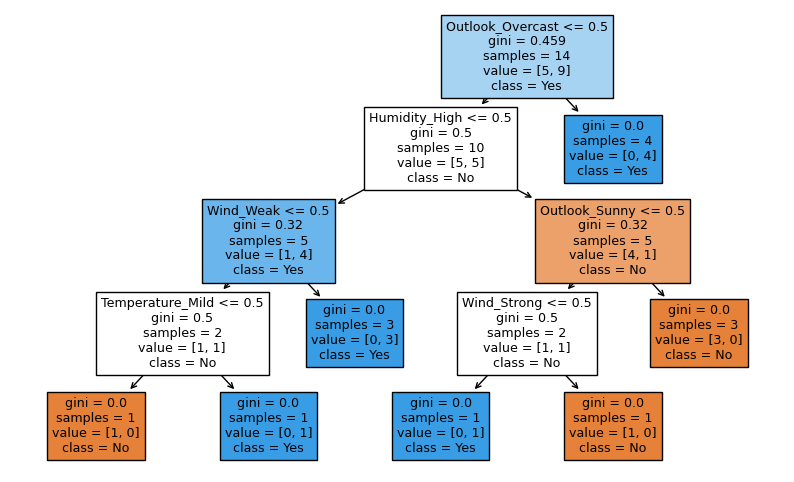

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df)

X = df_encoded.drop(columns=['Play Tennis'])
y = df_encoded['Play Tennis']

clf = DecisionTreeClassifier(criterion='gini', random_state=40)
clf.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


###*Iris Dataset*

In [ ]:
import pandas as pd
df2=pd.read_csv('/content/iris.csv')
df2


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


###*Iris.csv Decision Tree*

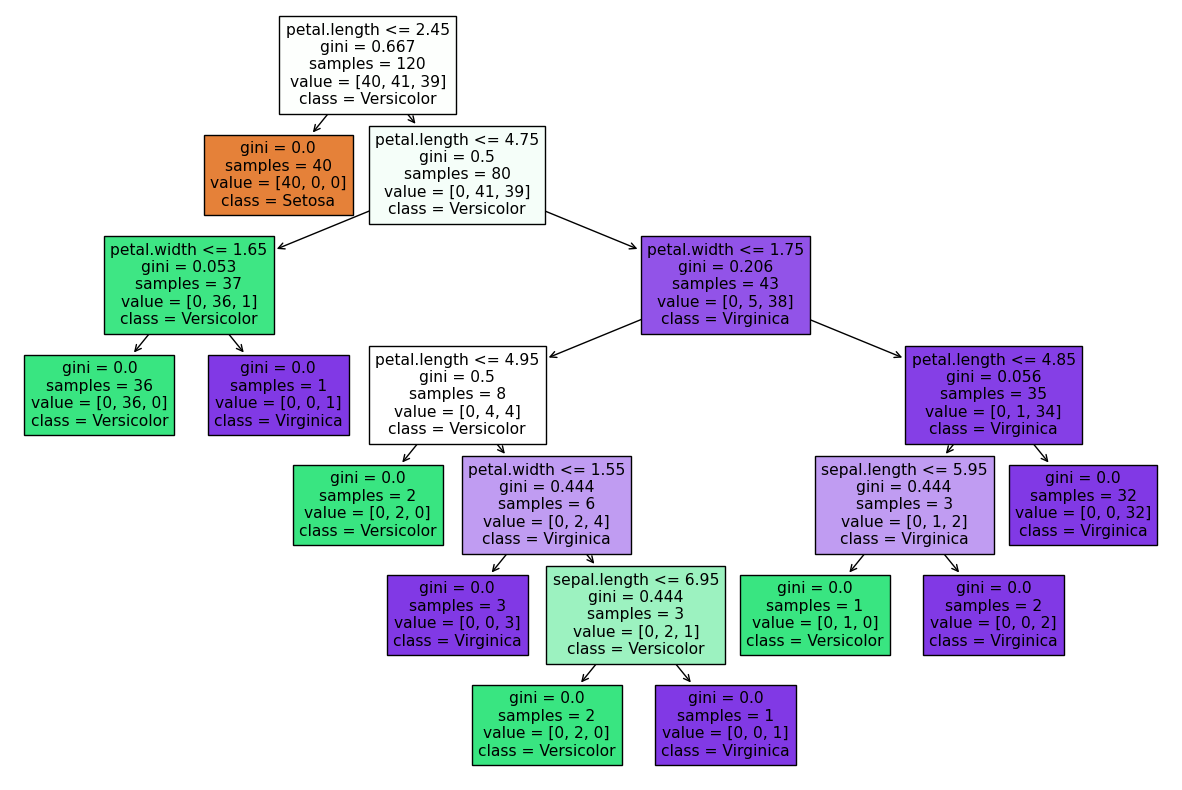

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df2.drop(columns=['variety'])
y = df2['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()





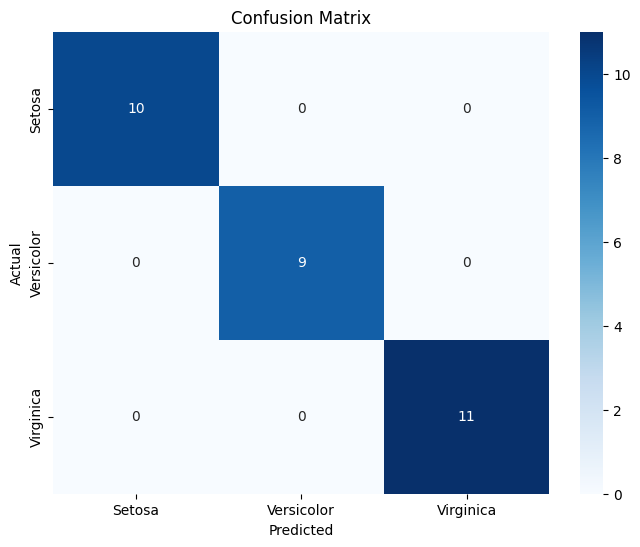

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###*Breast Cancer Overfitting Check*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#Load Dataset
df_breast_cancer = pd.read_csv('/content/data.csv')
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_breast_cancer.drop(columns=['diagnosis']))
y = df_breast_cancer['diagnosis']

#Train,Test and Accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Check for overfitting
if train_accuracy - test_accuracy > 0.2:
    print("Model may be overfitting to the training data.")
else:
    print("Model is not overfitting.")


Training Accuracy: 1.0
Testing Accuracy: 0.9385964912280702
Model is not overfitting.


###*Regressor on Car Prediction Dataset*

In [ ]:
df_car = pd.read_csv('/content/OLX_Car_Data_CSV.csv', encoding='latin1')
df_car.head(5)


,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


df_car = pd.read_csv('/content/OLX_Car_Data_CSV.csv', encoding='latin1')
df_car_numeric = df_car.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
df_car_imputed = pd.DataFrame(imputer.fit_transform(df_car_numeric), columns=df_car_numeric.columns)
X = df_car_imputed.drop(columns=['Price'])
y = df_car_imputed['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1953191182282.7637
R-squared: 0.06765135034739511
